# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../../PIAIC/ionosphere_data.csv")
dataset

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
dataset.isna().sum().sum()

0

In [4]:
dataset.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dt = pd.DataFrame(dataset.dtypes)
dt[dt[0] == object]

,0
label,object


In [6]:
shuffled_dataset = dataset.sample(frac=1, random_state = 42)

In [7]:
shuffled_dataset

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
157,1,0,0.47090,0.22751,0.42328,0.33598,0.25661,0.47619,0.01852,0.49471,...,0.00265,0.03574,-0.31739,0.15873,-0.21693,0.24868,-0.24339,0.26720,0.04233,g
342,1,0,0.82254,-0.07572,0.80462,0.00231,0.87514,-0.01214,0.86821,-0.07514,...,-0.02370,0.76717,-0.02731,0.74046,-0.07630,0.70058,-0.04220,0.78439,0.01214,g
316,1,0,0.89589,0.39286,0.66129,0.71804,0.29521,0.90824,-0.04787,0.94415,...,-0.85703,0.53229,-0.68593,0.74846,-0.40656,0.83142,-0.07029,0.76862,0.27926,g
234,1,0,0.68729,1.00000,0.91973,-0.76087,0.81773,0.04348,0.76087,0.10702,...,-0.53846,0.89262,0.22216,0.71070,0.53846,1.00000,-0.06522,0.56522,0.23913,b
155,1,0,0.72414,-0.01084,0.79704,0.01084,0.80000,0.00197,0.79015,0.01084,...,-0.01478,0.78041,0.00612,0.74089,-0.05025,0.82956,0.02956,0.79015,0.00788,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1.00000,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,...,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,b
106,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,b
270,1,0,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,...,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g


In [8]:
shuffled_dataset.reset_index(drop = True, inplace = True)
shuffled_dataset

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.47090,0.22751,0.42328,0.33598,0.25661,0.47619,0.01852,0.49471,...,0.00265,0.03574,-0.31739,0.15873,-0.21693,0.24868,-0.24339,0.26720,0.04233,g
1,1,0,0.82254,-0.07572,0.80462,0.00231,0.87514,-0.01214,0.86821,-0.07514,...,-0.02370,0.76717,-0.02731,0.74046,-0.07630,0.70058,-0.04220,0.78439,0.01214,g
2,1,0,0.89589,0.39286,0.66129,0.71804,0.29521,0.90824,-0.04787,0.94415,...,-0.85703,0.53229,-0.68593,0.74846,-0.40656,0.83142,-0.07029,0.76862,0.27926,g
3,1,0,0.68729,1.00000,0.91973,-0.76087,0.81773,0.04348,0.76087,0.10702,...,-0.53846,0.89262,0.22216,0.71070,0.53846,1.00000,-0.06522,0.56522,0.23913,b
4,1,0,0.72414,-0.01084,0.79704,0.01084,0.80000,0.00197,0.79015,0.01084,...,-0.01478,0.78041,0.00612,0.74089,-0.05025,0.82956,0.02956,0.79015,0.00788,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,1.00000,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,...,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,b
347,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,b
348,1,0,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,...,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673,g
349,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g


In [9]:
shuffled_dataset.feature2.value_counts()

0    351
Name: feature2, dtype: int64

In [10]:
# Splitting dataset in data and labels
data = shuffled_dataset.drop("label", axis = 1)
label = shuffled_dataset.label
shuffled_dataset.shape, data.shape, label.shape

((351, 35), (351, 34), (351,))

In [11]:
# One_hot_encoding the labels
one_hot_label = pd.get_dummies(label, drop_first = True)
one_hot_label

,g
0,1
1,1
2,1
3,0
4,1
...,...
346,0
347,0
348,1
349,1


In [12]:
# Splitting data in training and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(data, one_hot_label, test_size = 0.4, random_state = 42)
len(train_data), len(test_data), len(train_label), len(test_label)

(210, 141, 210, 141)

In [13]:
train_data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
69,1,0,1.00000,1.00000,0.36700,0.06158,0.12993,0.92713,-0.27586,0.93596,...,0.73792,-0.45950,0.85471,-0.06831,1.00000,1.00000,0.38670,0.00246,0.17758,0.79790
302,1,0,0.89410,0.13425,0.87001,0.31543,0.78896,0.43388,0.63388,0.59975,...,-0.40552,0.50489,-0.46215,0.40753,-0.50314,0.27252,-0.52823,0.19172,-0.48808,0.05972
96,0,0,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,...,1.00000,-1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000
143,1,0,0.90116,0.16607,0.79299,0.37379,0.72990,0.50515,0.59784,0.72997,...,-0.68159,0.39951,-0.71844,0.25835,-0.72369,0.11218,-0.71475,-0.05525,-0.67699,-0.19904
267,1,0,-0.26667,0.40000,-0.27303,0.12159,-0.17778,-0.04444,0.06192,-0.06879,...,-0.00069,-0.00050,0.00019,-0.00043,0.00026,0.00005,0.00000,0.00015,-0.00008,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,1.00000,0.24168,1.00000,0.48590,1.00000,0.72973,1.00000,1.00000,...,0.64628,1.00000,0.38255,1.00000,0.10819,1.00000,-0.17370,1.00000,-0.81383,1.00000
106,0,0,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,...,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000
270,1,0,0.00000,0.00000,-0.33672,0.85388,0.00000,0.00000,0.68869,-1.00000,...,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,0.04447,0.61881,0.00000,0.00000
348,1,0,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,...,0.98164,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673


In [14]:
train_label

,g
69,1
302,1
96,0
143,1
267,0
...,...
71,1
106,0
270,0
348,1


In [15]:
# Building a model

# Setting up random seed
tf.random.set_seed(42)

# Setting Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 5)

# 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = "relu", input_shape = (train_data.shape[1],),
                         kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# 3. Fitting the model
history = model.fit(train_data, train_label, epochs = 100, callbacks = callback)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0161 - accuracy: 0.5185
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 0.9311 - accuracy: 0.7259
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.8781 - accuracy: 0.7568
Epoch 4/100
7/7 [==============================] - 0s 0s/step - loss: 0.8252 - accuracy: 0.8139
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7797 - accuracy: 0.8273
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7656 - accuracy: 0.8257
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7474 - accuracy: 0.8319
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.8449
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.8843
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.8634
Epoch 11/100
7/7 [============

7/7 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.9716
Epoch 85/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.9856
Epoch 86/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.9846
Epoch 87/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9874
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9776
Epoch 89/100
7/7 [==============================] - 0s 964us/step - loss: 0.1361 - accuracy: 0.9820
Epoch 90/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.9958
Epoch 91/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9825
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9677
Epoch 93/100
7/7 [==============================] - 0s 0s/step - loss: 0.1054 - accuracy: 0.9838
Epoch 94/100
7/7 [==============

In [16]:
# 4. Evaluating the performance of the model
model.evaluate(test_data, test_label)

5/5 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.9220


[0.25514447689056396, 0.9219858050346375]

In [17]:
# Making prediction
y_pred = model.predict(test_data)

<AxesSubplot:>

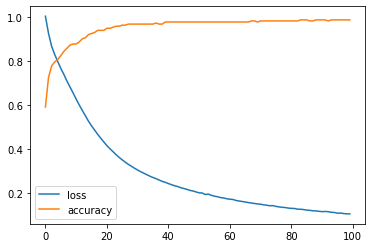

In [18]:
# Visualizing the loss and the accuracy of the training
pd.DataFrame(history.history).plot()

In [19]:
result = y_pred.round() == test_label
result.value_counts()

g    
True     130
False     11
dtype: int64